In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
path_to_csv = '/content/gdrive/My Drive/diabetes(1).csv'

# New Section

In [76]:
import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test,Y_train,Y_test = train_test_split(dataset[:,0:8],dataset[:,8],test_size=0.1,random_state=30)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(64, activation='relu', input_shape=(8,)))
my_first_nn.add(Dense(8, activation='relu'))
my_first_nn.add(Dense(16, activation='relu'))
my_first_nn.add(Dense(1, activation='sigmoid'))
my_first_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
my_first_nn.fit(X_train,Y_train,epochs=100,initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test,Y_test))

Epoch 1/100
22/22 [==============================] - 3s 8ms/step - loss: 0.3384 - acc: 0.6064
Epoch 2/100
22/22 [==============================] - 0s 7ms/step - loss: 0.2528 - acc: 0.6165
Epoch 3/100
22/22 [==============================] - 0s 7ms/step - loss: 0.2283 - acc: 0.6454
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 0.2165 - acc: 0.6469
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 0.2171 - acc: 0.6483
Epoch 6/100
22/22 [==============================] - 0s 7ms/step - loss: 0.2129 - acc: 0.6599
Epoch 7/100
22/22 [==============================] - 0s 9ms/step - loss: 0.2112 - acc: 0.6585
Epoch 8/100
22/22 [==============================] - 0s 8ms/step - loss: 0.2115 - acc: 0.6729
Epoch 9/100
22/22 [==============================] - 0s 7ms/step - loss: 0.2144 - acc: 0.6483
Epoch 10/100
22/22 [==============================] - 0s 8ms/step - loss: 0.2127 - acc: 0.6643
Epoch 11/100
22/22 [==============================] - 0s 9m

Epoch 1/10
235/235 [==============================] - 4s 7ms/step - loss: 0.4429 - accuracy: 0.8671 - val_loss: 0.2707 - val_accuracy: 0.9181
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1579 - accuracy: 0.9514 - val_loss: 0.1286 - val_accuracy: 0.9594
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1029 - accuracy: 0.9680 - val_loss: 0.1429 - val_accuracy: 0.9548
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0715 - accuracy: 0.9774 - val_loss: 0.1158 - val_accuracy: 0.9651
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.0881 - val_accuracy: 0.9739
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0368 - accuracy: 0.9879 - val_loss: 0.1355 - val_accuracy: 0.9572
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0755 - val_accuracy: 0.9779
Epoch 

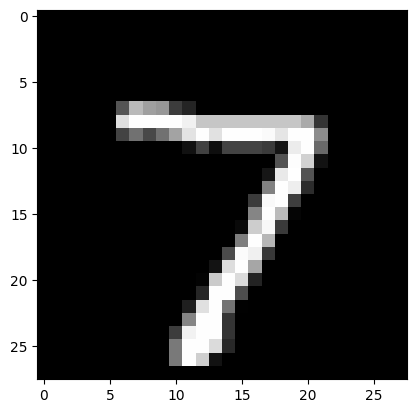

1/1 [==============================] - 0s 98ms/step
Predicted Class: 7, Actual Class: 7


In [57]:
#2nd program
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Loading the data
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

# Processing the data
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

# Convert data to float
train_data = train_data.astype('float')
test_data = test_data.astype('float')

# Scale data (you can comment out these lines to run without scaling)
train_data /=255.0
test_data /=255.0

# One-hot encoding the labels
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Creating the network with 3 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

# Plotting an image from the test dataset
plt.imshow(test_images[0], cmap='gray')
plt.show()

# Predicting the class
test_image = test_data[0].reshape(1, dimData)
predicted_class = np.argmax(model.predict(test_image), axis=-1)
print(f"Predicted Class: {predicted_class[0]}, Actual Class: {test_labels[0]}")
